In [34]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service

driver = webdriver.Chrome(service=Service("../driver/chromedriver"))
driver.get("https://www.selenium.dev/")

In [35]:
driver.current_url

'https://www.selenium.dev/'

In [36]:
driver.execute_script("window.scrollTo(0, document.body.scrollHeight)")

In [37]:
driver.execute_script("window.scrollTo(0, 0)")

In [38]:
from selenium.webdriver.common.by import By

element = driver.find_element(By.CLASS_NAME, "d-flex.justify-content-center.p-5.td-box--100")
child = element.find_element(By.CLASS_NAME, "selenium")

print(child.text)

News


In [39]:
#HTML과 다르게, XML은 문법 오류가 허용 안됨
driver.execute_script("arguments[0].scrollIntoView(true);", child)

In [13]:
driver.save_screenshot("../data/image_01.png")

True

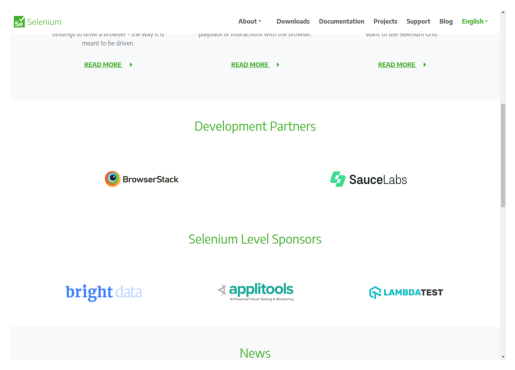

In [14]:
from matplotlib import pyplot as plt
from matplotlib import image as mpimg

image = mpimg.imread("../data/image_01.png")
plt.imshow(image)
plt.axis('off')
plt.show()

In [15]:
doc_link = driver.find_element(By.XPATH, '''//*[@id="main_navbar"]/ul/li[3]/a''')
doc_link.click()

In [16]:
search_btn = driver.find_element(By.XPATH, '''//*[@id="docsearch-1"]/button''')
search_btn.click()

In [17]:
from selenium.webdriver.common.keys import Keys

search_doc = driver.find_element(By.CSS_SELECTOR, "#docsearch-input")
search_doc.send_keys("find elements")

In [18]:
search_doc.send_keys(Keys.ENTER)

In [19]:
python_tab = driver.find_element(By.ID, "tabs-10-02-tab")

In [20]:
python_tab.click()

In [21]:
python_panel = driver.find_element(By.ID, "tabs-10-02")
python_code = python_panel.find_element(By.TAG_NAME, "code")

print(python_code.text)

from selenium import webdriver
from selenium.webdriver.common.by import By

driver = webdriver.Chrome()
driver.get("https://www.example.com")
##get elements from parent element using TAG_NAME

    # Get element with tag name 'div'
element = driver.find_element(By.TAG_NAME, 'div')

    # Get all the elements available with tag name 'p'
elements = element.find_elements(By.TAG_NAME, 'p')
for e in elements:
    print(e.text)

##get elements from parent element using XPATH
##NOTE: in order to utilize XPATH from current element, you must add "." to beginning of path

    # Get first element of tag 'ul'
element = driver.find_element(By.XPATH, '//ul')

    # get children of tag 'ul' with tag 'li'
elements  = driver.find_elements(By.XPATH, './/li')
for e in elements:
    print(e.text)
  


In [22]:
driver.back()

In [23]:
menu = driver.find_element(By.ID, "main_navbar")
li_list = menu.find_elements(By.TAG_NAME, "li")
for idx, li in enumerate(li_list):
    print("[ " + str(idx) + " ] ================================")
    print(li.get_attribute('innerHTML'))

[ 0 ] ================================
<a class="nav-link dropdown-toggle" href="#" id="navbarDropdown" role="button" data-bs-toggle="dropdown" aria-haspopup="true" aria-expanded="false">About</a><div class="dropdown-menu" aria-labelledby="navbarDropdown"><a class="dropdown-item" href="/about">About Selenium</a>
<a class="dropdown-item" href="/project">Structure and Governance</a>
<a class="dropdown-item" href="/events">Events</a>
<a class="dropdown-item" href="/ecosystem">Ecosystem</a>
<a class="dropdown-item" href="/history">History</a>
<a class="dropdown-item" href="/getinvolved">Get Involved</a>
<a class="dropdown-item" href="/sponsors">Sponsors</a>
<a class="dropdown-item" href="/sponsor">Sponsor Us</a></div>
[ 1 ] ================================
<a class="nav-link" href="/downloads"><span>Downloads</span></a>
[ 2 ] ================================
<a class="nav-link" href="/documentation"><span>Documentation</span></a>
[ 3 ] ================================
<a class="nav-link" h

In [26]:
about = li_list[0]
about.click()
link_list = about.find_elements(By.CLASS_NAME, "dropdown-item")
for link in link_list:
    print(link.text)

About Selenium
Structure and Governance
Events
Ecosystem
History
Get Involved
Sponsors
Sponsor Us


In [27]:
history = about.find_element(By.LINK_TEXT, "History")
print(history.text)

History


In [28]:
history.click()

In [29]:
driver.back()

In [30]:
from selenium.webdriver import ActionChains
import time

actions = ActionChains(driver)
actions.click(about)
actions.click(history)
actions.perform()

In [31]:
driver.back()

about = li_list[0]
link_list = about.find_elements(By.CLASS_NAME, "dropdown-item")
for link in link_list:
    print(link.get_attribute("href"))

https://www.selenium.dev/about
https://www.selenium.dev/project
https://www.selenium.dev/events
https://www.selenium.dev/ecosystem
https://www.selenium.dev/history
https://www.selenium.dev/getinvolved
https://www.selenium.dev/sponsors
https://www.selenium.dev/sponsor


In [32]:
from bs4 import BeautifulSoup

page = driver.page_source
soup = BeautifulSoup(page, "html.parser")
print(soup.prettify())

<html class="no-js" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width,initial-scale=1,shrink-to-fit=no" name="viewport"/>
  <link href="https://www.selenium.dev/documentation/_print/" rel="alternate" type="text/html"/>
  <meta content="index, follow" name="robots"/>
  <link href="/favicons/favicon.ico" rel="shortcut icon"/>
  <link href="/favicons/apple-touch-icon-180x180.png" rel="apple-touch-icon" sizes="180x180"/>
  <link href="/favicons/favicon-16x16.png" rel="icon" sizes="16x16" type="image/png"/>
  <link href="/favicons/favicon-32x32.png" rel="icon" sizes="32x32" type="image/png"/>
  <link href="/favicons/android-36x36.png" rel="icon" sizes="36x36" type="image/png"/>
  <link href="/favicons/android-48x48.png" rel="icon" sizes="48x48" type="image/png"/>
  <link href="/favicons/android-72x72.png" rel="icon" sizes="72x72" type="image/png"/>
  <link href="/favicons/android-96x96.png" rel="icon" sizes="96x96" type="image/png"/>
  <link href="/favicons/an

In [33]:
driver.close()

InvalidSessionIdException: Message: invalid session id: session deleted as the browser has closed the connection
from disconnected: not connected to DevTools
  (Session info: chrome=134.0.6998.35)
Stacktrace:
#0 0x5d3b8862546a <unknown>
#1 0x5d3b880deed0 <unknown>
#2 0x5d3b880c32d3 <unknown>
#3 0x5d3b880c46ef <unknown>
#4 0x5d3b880df7fa <unknown>
#5 0x5d3b880b2c04 <unknown>
#6 0x5d3b88168c11 <unknown>
#7 0x5d3b881683d8 <unknown>
#8 0x5d3b88156828 <unknown>
#9 0x5d3b881221be <unknown>
#10 0x5d3b88123981 <unknown>
#11 0x5d3b885eb86b <unknown>
#12 0x5d3b885ef73c <unknown>
#13 0x5d3b885d2f12 <unknown>
#14 0x5d3b885f02b4 <unknown>
#15 0x5d3b885b70af <unknown>
#16 0x5d3b88613ad8 <unknown>
#17 0x5d3b88613cb6 <unknown>
#18 0x5d3b886242e6 <unknown>
#19 0x7a3e2d894ac3 <unknown>
